# 1. Importing the CSV 

In [9]:
# Importing necessary packages 

import matplotlib.pyplot as plt
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns 


In [10]:
# Assigning CSV to a variable 

df = pd.read_csv('Intake Additional Needs Information (anonymised) - FE (Diploma) 24_25.csv')
df.head()



,Learner ID,Course,Campus,Date added to AND sheet,Holding Email Sent? \n(Y/N),Disability Code,EHCP?,Additional Information (disability details),1st Chase - (Email to meeting),2nd Chase - \nPhone Call,3rd Chase - Include Emergency Contact (Email),4th Chase - Text/Whatsapp,Final Email Sent?,George/Kyle Notes,Panel Notes,Panel Decision,Action Completed by AAT?\n(Y)
0,1562030,L3 Ext Dip Music Tech,G,26/1/23,Y,55.0,N,"A mental health condition, such as depression,...",NaN,NaN,NaN,NaN,NaN,Progress to audition (preferably an early slot...,NaN,NaN,Y
1,1561364,L3 Vocals,G,17/11/22,Y,51.0,Y,A specific learning difficulty such as dyslexi...,email sent 24th Nov inviting to pre-audition m...,NaN,2nd Email sent on 19th Dec,3rd email on 16th Feb - no emergency contact l...,email sent on 28/03,NaN,NaN,NaN,Withdraw app due to non engagement to chasers ...
2,1562770,L3 Ext Games Dev,G,25-05-2023,Y,53.0,Y,A social/communication impairment such as Aspe...,17th Oct parent contacted waiting on meeting d...,NaN,email sent 24th Nov inviting to pre-audition m...,NaN,NaN,Meeting booked for 6th December,Progress to audition - can meet need outlined ...,Invite to audition,Y
3,1562812,L3 Ext Vocals,G,08/07/2023,Y,51.0,N,A specific learning difficulty such as dyslexi...,NaN,NaN,NaN,NaN,NaN,Progress to audition,NaN,NaN,Y
4,1566171,L3 Creative Artist,G,18/08/23,Y,54.0,N,Diabetes,NaN,NaN,NaN,NaN,NaN,Progress to audition,NaN,NaN,Y


# 2. Data Cleaning 

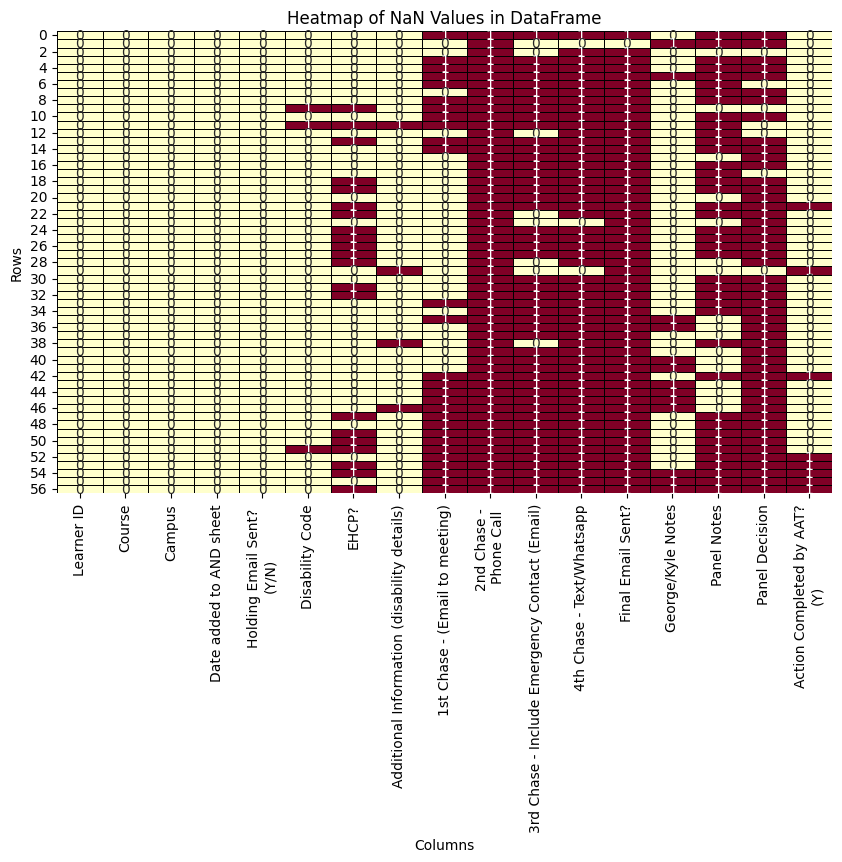

In [ ]:
# There are many NaN values in the dataset 

nan_df = df.isna()

plt.figure(figsize=(10, 6))
sns.heatmap(nan_df, cmap='YlOrRd', cbar=False, annot=True, linewidths=.5, linecolor='black')

plt.title('Heatmap of NaN Values in DataFrame')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()


In [ ]:
# There are many insonsitencies with the way course details have been entered 

df['Course'].value_counts()

Course
L3 Vocals                     6
L3 Production                 5
L2 Production                 4
L2 Vocals                     3
L3 Guitar                     3
L3 Ext Vocals                 3
L3 Ext Guitar                 2
L3 Ext Dip Creative Artist    2
L3 Songwriting                2
L3 Vocals                     2
L3 Ext Dip Guitar             2
L3 Creative Artist            2
L3 Music Production           2
L3 Ext Games Dev              1
L2 Drums                      1
L3 Ext Dip Music Tech         1
L3 Bass                       1
Level 2 Music Production      1
L3 Drums                      1
L3 Games                      1
1+2yr Production              1
L3 Ext Dip                    1
L3 Ext Dip Production         1
L2 Songwriting                1
L3 Games Dev                  1
L2 Creative Artist            1
L3 Peformance - Guitar        1
L3 Extended Dip\n2025         1
L3 Ext Dip Drums              1
L2 Ext Dip\nVocals            1
L3 Ext Dip Keys               1
L

In [ ]:
# This function resolves the inconsistencies identified above 

def format_course(course):
    course = course.strip()

    if 'L3' in course:
        if 'Ext' in course or 'Extended' in course:
            course = course.replace('L3', 'L3.2')  # Use L3.2 for Extended levels
        else:
            course = course.replace('L3', 'L3.1')  # Use L3.1 for regular levels

    course = course.replace('1+2yr Production', 'L2.1 Production')

    course = course.replace('Level 2', 'L2')

    course = course.replace('Dip', '').replace('Diploma', '').replace('dip', '').replace('diploma', '').replace('loma', '').strip()

    course = course.replace('Dev', '').replace('dev', '').strip()

    course = course.replace('Music Tech', 'Production').replace('music tech', 'Production')

    course = course.replace('Music', '').replace('music', '').strip()

    course = course.replace('Songwriting', 'Creative Artist')

    instruments = ['Vocals', 'Guitar', 'Bass', 'Drums', 'Keys']
    for instrument in instruments:
        if instrument in course:
            if f'Performance {instrument}' not in course and f'{instrument}' in course:
                course = course.replace(f'{instrument}', f'Performance {instrument}')

    course = course.replace('Ext', '').replace('Extended', '').strip()

    course = course.replace('Produciton', 'Production').replace('Peformance', 'Performance')

    course = ' '.join(course.split())  

    return course

df['Formatted Course'] = df['Course'].apply(format_course)

print(df[['Course', 'Formatted Course']])
print(df['Formatted Course'].value_counts())

                        Course                       Formatted Course
0        L3 Ext Dip Music Tech                        L3.2 Production
1                    L3 Vocals                L3.1 Performance Vocals
2             L3 Ext Games Dev                             L3.2 Games
3               L3 Ext Vocals                 L3.2 Performance Vocals
4           L3 Creative Artist                   L3.1 Creative Artist
5                    L2 Vocals                  L2 Performance Vocals
6                     L2 Drums                   L2 Performance Drums
7                L3 Ext Guitar                L3.2 Performance Guitar
8            L3 Ext Dip Guitar                L3.2 Performance Guitar
9   L3 Ext Dip Creative Artist                   L3.2 Creative Artist
10    Level 2 Music Production                          L2 Production
11                   L3 Guitar                L3.1 Performance Guitar
12          L3 Creative Artist                   L3.1 Creative Artist
13                  

In [14]:
# Replacing 'Course' with 'Formatted Course' but keeping title

df.drop(columns=['Course'], inplace=True)
df.rename(columns={'Formatted Course': 'Course'}, inplace=True)
df.head()

,Learner ID,Campus,Date added to AND sheet,Holding Email Sent? \n(Y/N),Disability Code,EHCP?,Additional Information (disability details),1st Chase - (Email to meeting),2nd Chase - \nPhone Call,3rd Chase - Include Emergency Contact (Email),4th Chase - Text/Whatsapp,Final Email Sent?,George/Kyle Notes,Panel Notes,Panel Decision,Action Completed by AAT?\n(Y),Course
0,1562030,G,26/1/23,Y,55.0,N,"A mental health condition, such as depression,...",NaN,NaN,NaN,NaN,NaN,Progress to audition (preferably an early slot...,NaN,NaN,Y,L3.2 Production
1,1561364,G,17/11/22,Y,51.0,Y,A specific learning difficulty such as dyslexi...,email sent 24th Nov inviting to pre-audition m...,NaN,2nd Email sent on 19th Dec,3rd email on 16th Feb - no emergency contact l...,email sent on 28/03,NaN,NaN,NaN,Withdraw app due to non engagement to chasers ...,L3.1 Performance Vocals
2,1562770,G,25-05-2023,Y,53.0,Y,A social/communication impairment such as Aspe...,17th Oct parent contacted waiting on meeting d...,NaN,email sent 24th Nov inviting to pre-audition m...,NaN,NaN,Meeting booked for 6th December,Progress to audition - can meet need outlined ...,Invite to audition,Y,L3.2 Games
3,1562812,G,08/07/2023,Y,51.0,N,A specific learning difficulty such as dyslexi...,NaN,NaN,NaN,NaN,NaN,Progress to audition,NaN,NaN,Y,L3.2 Performance Vocals
4,1566171,G,18/08/23,Y,54.0,N,Diabetes,NaN,NaN,NaN,NaN,NaN,Progress to audition,NaN,NaN,Y,L3.1 Creative Artist


In [15]:
# Convert 'Date added to AND sheet' to datetime format 

df['Date added to AND sheet'] = pd.to_datetime(df['Date added to AND sheet'], errors='coerce')

/var/folders/jc/c0z81m7146x_0kpg0l5rbysm0000gn/T/ipykernel_2071/3524070188.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date added to AND sheet'] = pd.to_datetime(df['Date added to AND sheet'], errors='coerce')


In [16]:
# Make holding email column name more concise and standardise capitalisation 

df.rename(columns={'Holding Email Sent? \n(Y/N)': 'Holding Email Sent'}, inplace=True)
df['Holding Email Sent'] = df['Holding Email Sent'].str.upper()

In [ ]:
# Creating a category column that groups by pathway 
def categorise(course):
    if 'Performance' in course:
        return 'Performance'
    elif 'Production' in course:
        return 'Production'
    elif 'Creative Artist' in course:
        return 'Creative Artist'
    elif 'Games' in course:
        return 'Games'
    return 'Unknown'

df['Category'] = df['Course'].apply(categorise)
df.head(1)

,Learner ID,Campus,Date added to AND sheet,Holding Email Sent,Disability Code,EHCP?,Additional Information (disability details),1st Chase - (Email to meeting),2nd Chase - \nPhone Call,3rd Chase - Include Emergency Contact (Email),4th Chase - Text/Whatsapp,Final Email Sent?,George/Kyle Notes,Panel Notes,Panel Decision,Action Completed by AAT?\n(Y),Course,Category
0,1562030,G,2023-01-26,Y,55.0,N,"A mental health condition, such as depression,...",NaN,NaN,NaN,NaN,NaN,Progress to audition (preferably an early slot...,NaN,NaN,Y,L3.2 Production,Production


In [28]:
# Creating a column which reflects HESA disability code definitions 

# Disability mapping with float keys
disability_mapping = {
    55.0: 'Mental Health Condition',
    51.0: 'Learning Difficulty',
    53.0: 'Social and Communication Impairment',
    54.0: 'Health Condition',
    96.0: 'Other',
    56.0: 'Physical or Mobility',
    57.0: 'Deaf or Serious Hearing Impairment',
    59.0: 'Developmental Condition'
}

# Map disability codes to their descriptions
df['Disability Description'] = df['Disability Code'].map(disability_mapping)

df.head(1)


,Learner ID,Campus,Date added to AND sheet,Holding Email Sent,Disability Code,EHCP?,Additional Information (disability details),1st Chase - (Email to meeting),2nd Chase - \nPhone Call,3rd Chase - Include Emergency Contact (Email),4th Chase - Text/Whatsapp,Final Email Sent?,George/Kyle Notes,Panel Notes,Panel Decision,Action Completed by AAT?\n(Y),Course,Category,Disability Description
0,1562030,G,2023-01-26,Y,55.0,N,"A mental health condition, such as depression,...",NaN,NaN,NaN,NaN,NaN,Progress to audition (preferably an early slot...,NaN,NaN,Y,L3.2 Production,Production,Mental Health Condition


# 3. Investigating Key Questions

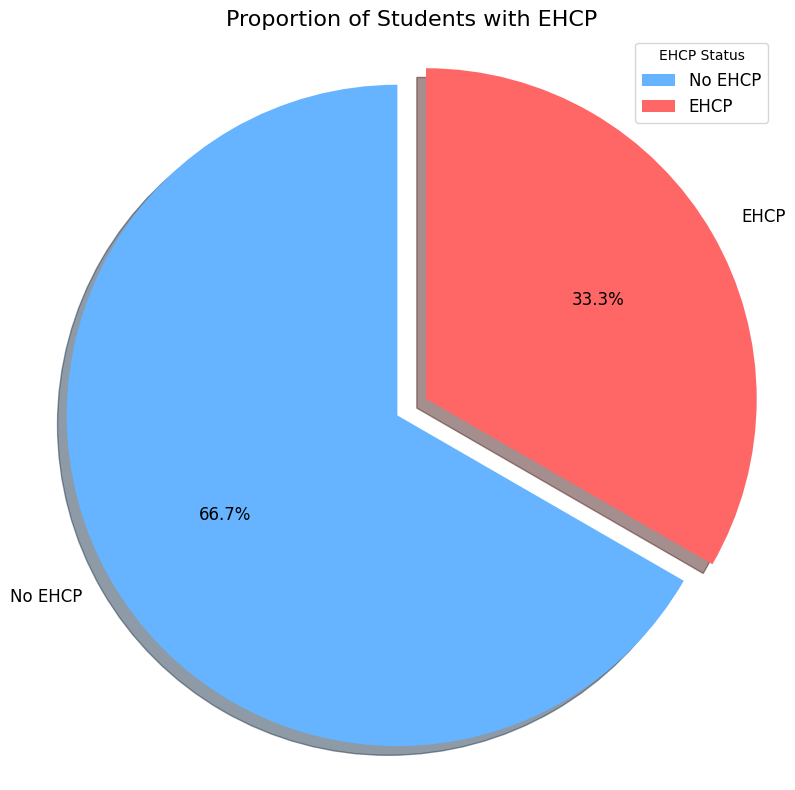

In [ ]:
# What proportion of students on the AND register have an EHCP? 

# Count the number of students with 'Y' and 'N'
ehcp_counts = df['EHCP?'].value_counts()

# Rename the index to make the labels more descriptive
ehcp_counts.index = ['EHCP' if x == 'Y' else 'No EHCP' for x in ehcp_counts.index]

# Create a mapping of the correct colors to each label
colors = ['#ff6666' if label == 'EHCP' else '#66b3ff' for label in ehcp_counts.index]

# Explode the slices to make them more prominent
explode = (0.1, 0)  

plt.figure(figsize=(8, 8))
plt.pie(
    ehcp_counts,
    labels=ehcp_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    explode=explode,
    shadow=True,  
    textprops={'fontsize': 12}  
)

plt.title('Proportion of Students with EHCP', fontsize=16)

plt.legend(ehcp_counts.index, title="EHCP Status", loc="upper right", fontsize=12)

plt.axis('equal')  
plt.tight_layout() 
plt.show()

/var/folders/jc/c0z81m7146x_0kpg0l5rbysm0000gn/T/ipykernel_2071/3821745581.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20', num_categories).colors
/var/folders/jc/c0z81m7146x_0kpg0l5rbysm0000gn/T/ipykernel_2071/3821745581.py:45: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if disability_counts[i] < 5:  # Check if the slice is small


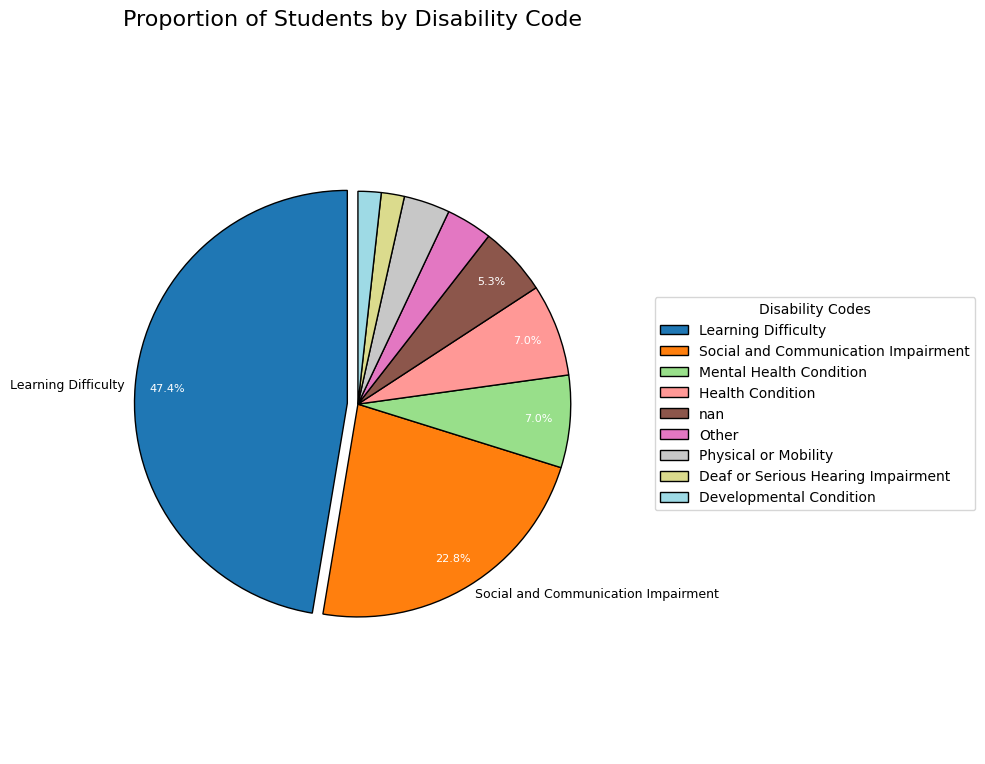

In [ ]:
# Which disabilities/additional needs are most common? 

disability_mapping = {
    '55.0': 'Mental Health Condition',
    '51.0': 'Learning Difficulty',
    '53.0': 'Social and Communication Impairment',
    '54.0': 'Health Condition',
    '96.0': 'Other',
    '56.0': 'Physical or Mobility',
    '57.0': 'Deaf or Serious Hearing Impairment',
    '59.0': 'Developmental Condition'
}

disability_counts = df['Disability Code'].astype(str).value_counts()

disability_counts.index = [disability_mapping.get(code, code) for code in disability_counts.index]

num_categories = len(disability_counts)
colors = cm.get_cmap('tab20', num_categories).colors

def autopct_format(pct):
    return f'{pct:.1f}%' if pct > 5 else ''  

plt.figure(figsize=(10, 8))  
wedges, texts, autotexts = plt.pie(
    disability_counts,
    labels=disability_counts.index,
    autopct=autopct_format, 
    startangle=90,
    colors=colors,
    explode=[0.05 if i == 0 else 0 for i in range(num_categories)],  
    pctdistance=0.85,  
    labeldistance=1.05,  
    wedgeprops={'linewidth': 1, 'edgecolor': 'black'}  
)


for i, text in enumerate(texts):
    if disability_counts[i] < 5:  
        text.set_visible(False)  
    text.set_fontsize(9)  
    text.set_color('black') 


for autotext in autotexts:
    autotext.set_fontsize(8)  
    autotext.set_color('white')  


plt.legend(wedges, disability_counts.index, title="Disability Codes", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), fontsize=10)


plt.title('Proportion of Students by Disability Code', fontsize=16, pad=20)  


plt.axis('equal')


plt.tight_layout(pad=2)  
plt.show()


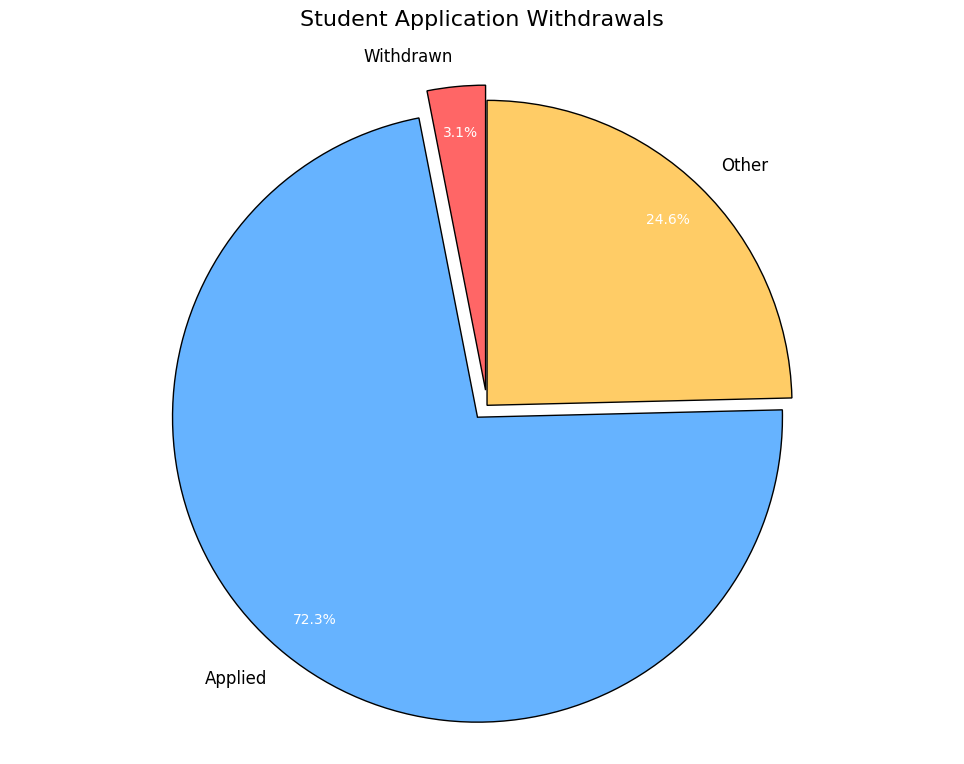

In [ ]:
# What proportion of students have withdrawn their applications? 

withdrawn_count = df['Action Completed by AAT?\n(Y)'].str.contains('WITH', case=False, na=False).sum()
applied_count = df['Action Completed by AAT?\n(Y)'].str.contains('Y', case=False, na=False).sum()
other_count = df['Action Completed by AAT?\n(Y)'].isna().sum() + (len(df) - withdrawn_count - applied_count)

action_counts = pd.Series([withdrawn_count, applied_count, other_count], index=['Withdrawn', 'Applied', 'Other'])

colors = ['#ff6666', '#66b3ff', '#ffcc66']  


plt.figure(figsize=(10, 8)) 
wedges, texts, autotexts = plt.pie(
    action_counts,
    labels=action_counts.index,
    autopct='%1.1f%%',  
    startangle=90,
    colors=colors,
    explode=(0.05, 0.05, 0),  
    pctdistance=0.85,  
    wedgeprops={'linewidth': 1, 'edgecolor': 'black'}  
)


for i, text in enumerate(texts):
    text.set_fontsize(12) 
    text.set_color('black')  


for autotext in autotexts:
    autotext.set_fontsize(10)  
    autotext.set_color('white')  


plt.title('Student Application Withdrawals', fontsize=16, pad=20)  


plt.axis('equal')


plt.tight_layout(pad=2) 
plt.show()


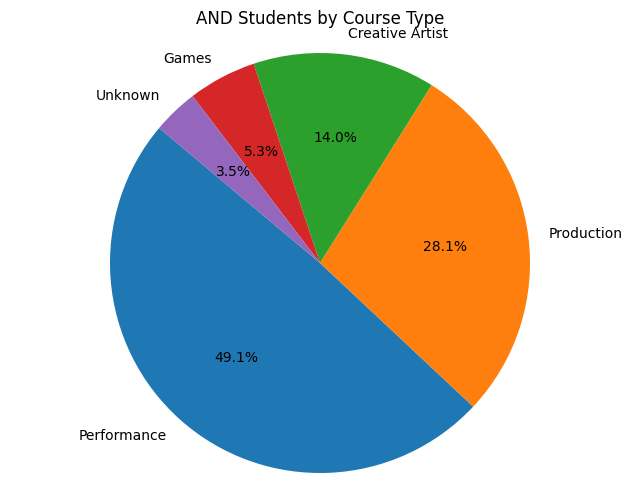

In [ ]:
# Which courses/pathways have the highest number of AND students? 

category_counts = df['Category'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('AND Students by Course Type')  
plt.axis('equal')  
plt.show()

Production Counts:
Disability Description
Learning Difficulty                    10
Mental Health Condition                 2
Developmental Condition                 1
Health Condition                        1
Social and Communication Impairment     1
Physical or Mobility                    1
Name: count, dtype: int64
Performance Counts:
Disability Description
Learning Difficulty                    13
Social and Communication Impairment     8
Other                                   2
Deaf or Serious Hearing Impairment      1
Mental Health Condition                 1
Physical or Mobility                    1
Name: count, dtype: int64
Games Counts:
Disability Description
Social and Communication Impairment    2
Learning Difficulty                    1
Name: count, dtype: int64
Creative Artist Counts:
Disability Description
Health Condition                       2
Learning Difficulty                    2
Social and Communication Impairment    2
Mental Health Condition                1
Nam

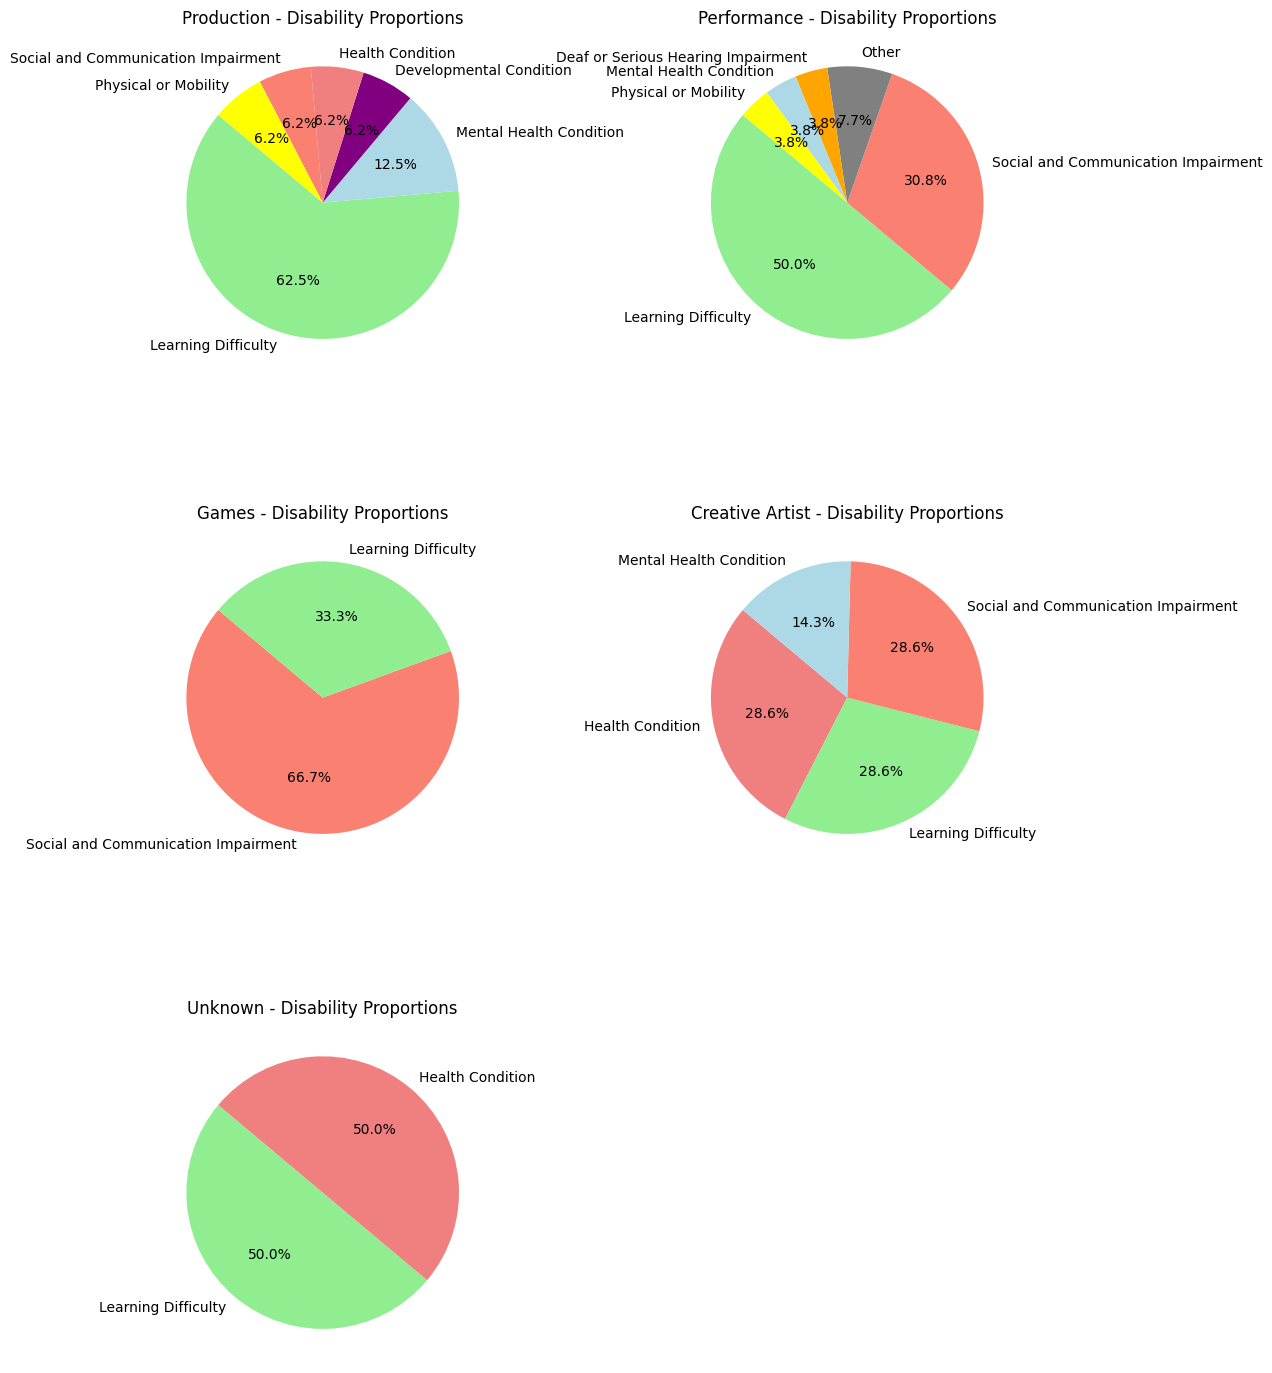

In [ ]:
# Investigating disability proportions by pathway. 

disability_colors = {
    'Mental Health Condition': 'lightblue',
    'Learning Difficulty': 'lightgreen',
    'Social and Communication Impairment': 'salmon',
    'Health Condition': 'lightcoral',
    'Other': 'gray',
    'Physical or Mobility': 'yellow',
    'Deaf or Serious Hearing Impairment': 'orange',
    'Developmental Condition': 'purple'
}

categories = df['Category'].unique()
num_categories = len(categories)
rows = (num_categories + 1) // 2  
cols = 2

plt.figure(figsize=(12, 5 * rows))

for i, category in enumerate(categories, start=1):
    plt.subplot(rows, cols, i)
    category_data = df[df['Category'] == category]
    disability_counts = category_data['Disability Description'].value_counts()
    
    # Debug print to check counts
    print(f'{category} Counts:')
    print(disability_counts)
    
    if not disability_counts.empty:
        plt.pie(
            disability_counts, 
            labels=disability_counts.index, 
            autopct='%1.1f%%', 
            startangle=140, 
            colors=[disability_colors.get(label, 'lightgray') for label in disability_counts.index]
        )
        plt.title(f'{category} - Disability Proportions')
    else:
        plt.text(0.5, 0.5, 'No Data', horizontalalignment='center', verticalalignment='center')

plt.tight_layout()
plt.show()